The following 3 blocks of code allows us to access the large dataset quicker

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1pjIThaPx_QY7I_tErY1iF2KMiReJrGhT/view'
 
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('LIWC-22 Results - 79k_Combined - LIWC Analysis.csv') 
 
df = pd.read_csv('LIWC-22 Results - 79k_Combined - LIWC Analysis.csv')
print(df)

       Label ColumnID                                               Text  \
0          1     Text  In the small southern market town of Molcaxac,...   
1          1     Text  Killing Obama administration rules, dismantlin...   
2          1     Text  The confirmation process for Republican Presid...   
3          1     Text  NICE, France  —   It was the first and last fi...   
4          0     Text  Home » Silver » Silver News » It’s Only A Matt...   
...      ...      ...                                                ...   
78583      0     Text  Patrick Henningsen 21st Century WireDespite re...   
78584      1     Text  ASHTON HAYES, England  —   This small village ...   
78585      1     Text  The U.S. Senate has postponed confirmation hea...   
78586      0     Text  While in Virginia, GOP presidential nominee Do...   
78587      1     Text  Latest And Perhaps Last Debate Highlights Anim...   

       Segment    WC  Analytic  Clout  Authentic   Tone    WPS  ...  nonflu  \
0       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from __future__ import division
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
print( '# of rows and columns before removing NaN instances:', df.shape )

# get rid of instances containing NaN
df = df.dropna()
print( '# of rows and columns after removing NaN instances:', df.shape )

# of rows and columns before removing NaN instances: (78588, 122)
# of rows and columns after removing NaN instances: (78587, 122)


In [ ]:
# specify X and y
X, y = df.iloc[:, 3:].values, df.iloc[:, 0].values

# train-test split - 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# standardize input
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

------- Model Results ------- 

Optimizing C for Logistic Regression

In [ ]:
# Kelsey's code for Logistic Regression
# Classifier: Logistic Regression
print( "Logistic Regression Classifier" )

cparam = [ 0.001, 0.01, 0.1, 0.25, 0.3, 0.4, 0.5, 0.75, 0.9, 1 ]
training_time = []
testing_time = []
misclassified_samp = []
misclassified_percent = []
train_prec_score = []
test_prec_score = []

for x in range ( len (cparam) ):
  start_time = time.time()
  
  logreg = LogisticRegression( random_state = 5, C=cparam[x], max_iter = 1000 ) 
  logreg.fit( X_train_std, y_train )
  end_time = time.time()
  print( "C =", cparam[x])
  print( "Training time:", end_time - start_time )
  training_time.append( end_time - start_time )
  
  start_time = time.time()
  y_pred = logreg.predict( X_test_std )
  end_time = time.time()
  print( "Testing time:", end_time - start_time )
  testing_time.append( end_time - start_time )
  print( "# of samples tested:", len(y_test) )
  print('Misclassified samples: %d'%(y_test != y_pred).sum())
  misclassified_samp.append((y_test != y_pred).sum())
  print ('Percentage of Misclassified samples:',(y_test != y_pred).sum() / len(y_test) * 100 ) 
  misclassified_percent.append((y_test != y_pred).sum() / len(y_test) * 100)
  
  print( "Training Precision Score:", logreg.score( X_train_std, y_train ))
  train_prec_score.append( logreg.score( X_train_std, y_train ) )
  print( "Testing Precision Score:", logreg.score( X_test_std, y_test ))
  test_prec_score.append( logreg.score( X_test_std, y_test ) )
  print()

Logistic Regression Classifier
C = 0.001
Training time: 0.6941180229187012
Testing time: 0.0068950653076171875
# of samples tested: 15718
Misclassified samples: 2595
Percentage of Misclassified samples: 16.50973406285787
Training Precision Score: 0.8372011643258204
Testing Precision Score: 0.8349026593714213

C = 0.01
Training time: 1.4906723499298096
Testing time: 0.005057811737060547
# of samples tested: 15718
Misclassified samples: 2521
Percentage of Misclassified samples: 16.03893625143148
Training Precision Score: 0.8420684280010816
Testing Precision Score: 0.8396106374856852

C = 0.1
Training time: 4.5061492919921875
Testing time: 0.005025148391723633
# of samples tested: 15718
Misclassified samples: 2503
Percentage of Misclassified samples: 15.924417864868303
Training Precision Score: 0.8430546056084874
Testing Precision Score: 0.840755821351317

C = 0.25
Training time: 4.866809606552124
Testing time: 0.007981061935424805
# of samples tested: 15718
Misclassified samples: 2495
Pe

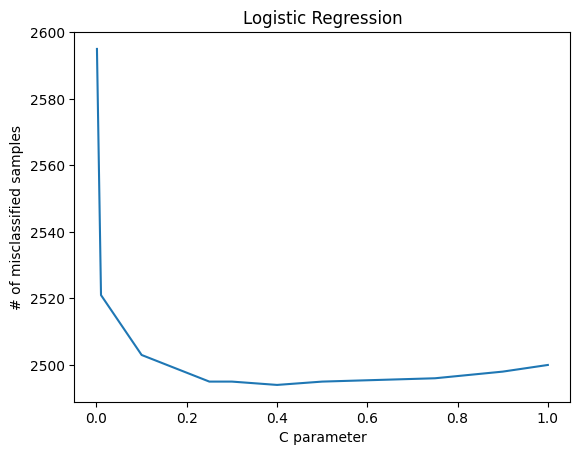

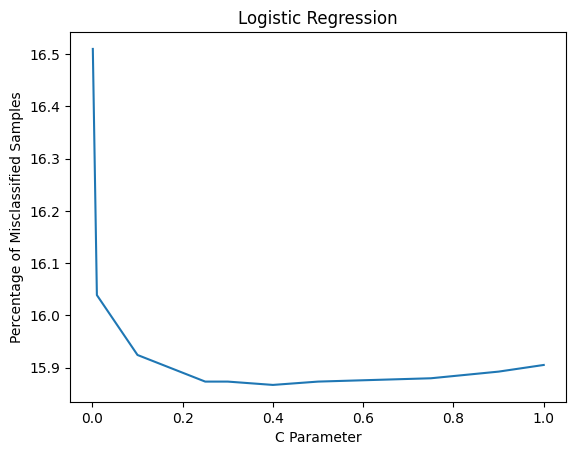

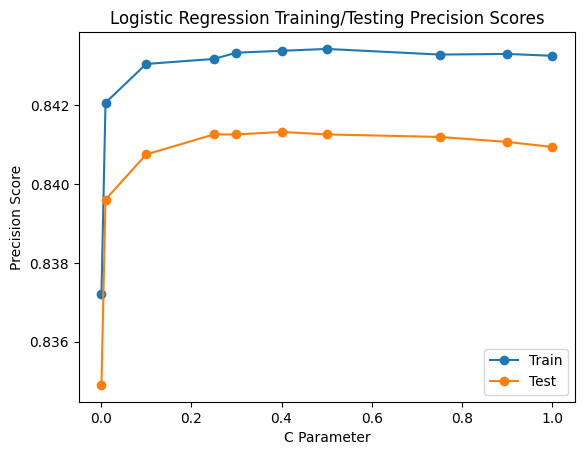

In [ ]:
plt.plot( cparam, misclassified_samp )
plt.xlabel( "C parameter" )
plt.ylabel( "# of misclassified samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, misclassified_percent )
plt.xlabel( "C Parameter" )
plt.ylabel( "Percentage of Misclassified Samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, train_prec_score, '-o', label='Train')
plt.plot( cparam, test_prec_score, '-o', label='Test')
plt.xlabel( "C Parameter" )
plt.ylabel( "Precision Score" )
plt.title( "Logistic Regression Training/Testing Precision Scores" )
plt.legend()

Logistic Regression

Best results were given when C = 0.4

C = 0.4

Training time: 4.269660711288452

Testing time: 0.0037016868591308594

Number of samples tested: 15718

Misclassified samples: 2494

Percentage of Misclassified samples: 15.867158671586715

Training Precision Score: 0.8433886335077702

Testing Precision Score: 0.8413284132841329

In [ ]:
# Classifier: Decision Tree
print( "Decision Tree" )
max_depth = [i for i in range(1, 21)]
training_time = []
testing_time = []
misclassified_samp = []
misclassified_percent = []
train_prec_score = []
test_prec_score = []

for x in range( len( max_depth )):
  start_time = time.time()

  # when max_depth was changed from 10 to 15, the precision score was higher
  dt = DecisionTreeClassifier( random_state = 5, max_depth = max_depth[x], min_samples_split = 3 ) 
  dt.fit( X_train, y_train )
  end_time = time.time()
  print( "max_depth =", max_depth[x])
  print( "Training time:", end_time - start_time )
  training_time.append( end_time - start_time )

  start_time = time.time()
  y_pred = dt.predict( X_test )
  end_time = time.time()
  print( "Testing time:", end_time - start_time )
  testing_time.append( end_time - start_time )
  print( "# of samples tested:", len(y_test) )
  print('Misclassified samples: %d'%(y_test != y_pred).sum())
  misclassified_samp.append( (y_test != y_pred).sum() )
  print ('Percentage of Misclassified samples:',(y_test != y_pred).sum() / len(y_test) * 100 ) 
  misclassified_percent.append( (y_test != y_pred).sum() / len(y_test) * 100 )

  print( "Training Precision Score:", dt.score( X_train, y_train ))
  train_prec_score.append( dt.score( X_train, y_train ) )
  print( "Testing Precision Score:", dt.score( X_test, y_test ))
  test_prec_score.append( dt.score( X_test, y_test ) )
  print()

Decision Tree
max_depth = 1
Training time: 0.5234165191650391
Testing time: 0.005578279495239258
# of samples tested: 15718
Misclassified samples: 5392
Percentage of Misclassified samples: 34.30461890825805
Training Precision Score: 0.6626000095436543
Testing Precision Score: 0.6569538109174196

max_depth = 2
Training time: 0.9679791927337646
Testing time: 0.007067680358886719
# of samples tested: 15718
Misclassified samples: 4853
Percentage of Misclassified samples: 30.875429443949614
Training Precision Score: 0.6915013758768233
Testing Precision Score: 0.6912457055605039

max_depth = 3
Training time: 1.4126532077789307
Testing time: 0.005126237869262695
# of samples tested: 15718
Misclassified samples: 3921
Percentage of Misclassified samples: 24.945921873011834
Training Precision Score: 0.7509742480395744
Testing Precision Score: 0.7505407812698817

max_depth = 4
Training time: 1.9208288192749023
Testing time: 0.005936145782470703
# of samples tested: 15718
Misclassified samples: 34

max_depth = 8

Training time: 3.802910804748535

Testing time: 0.006146430969238281

Number of samples tested: 15718

Misclassified samples: 2470

Percentage of Misclassified samples: 15.714467489502482

Training Precision Score: 0.8589606960505177

Testing Precision Score: 0.8428553251049752

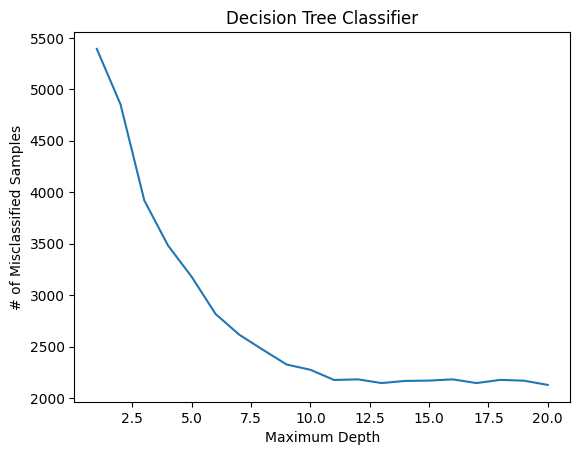

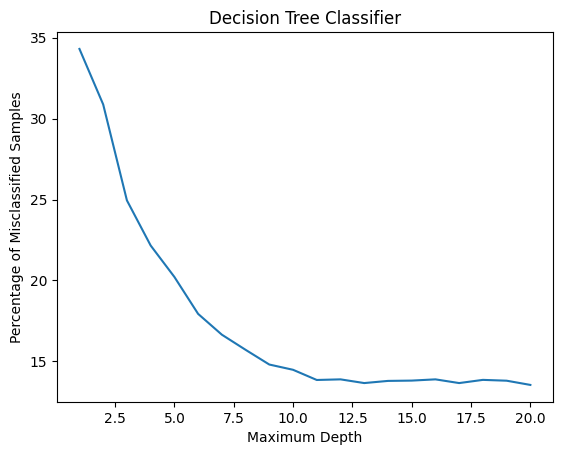

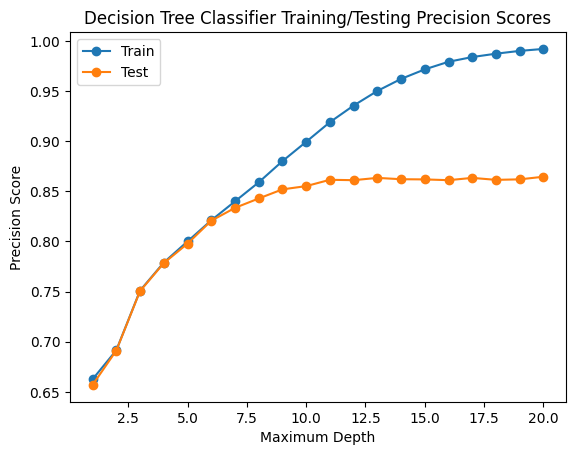

In [ ]:
plt.plot( max_depth, misclassified_samp )
plt.xlabel( "Maximum Depth" )
plt.ylabel( "# of Misclassified Samples")
plt.title( "Decision Tree Classifier" )
plt.show()

plt.plot( max_depth, misclassified_percent )
plt.xlabel( "Maximum Depth" )
plt.ylabel( "Percentage of Misclassified Samples")
plt.title( "Decision Tree Classifier" )
plt.show()

plt.plot( max_depth, train_prec_score, '-o', label='Train')
plt.plot( max_depth, test_prec_score, '-o', label='Test')
plt.xlabel( "Maximum Depth" )
plt.ylabel( "Precision Score" )
plt.title( "Decision Tree Classifier Training/Testing Precision Scores" )
plt.legend()

In [ ]:
# Kelsey's code for Naive Bayes
# Classifier: Naive Bayes 
print( "Naive Bayes Classifier: Gaussian" )

#for x in range ( len (var_smoothing) ):
start_time = time.time()

nb = GaussianNB() 
nb.fit( X_train_std, y_train )
end_time = time.time()
# print( "var_smoothing =", var_smoothing[x])
print( "Training time:", end_time - start_time )

start_time = time.time()
y_pred = nb.predict( X_test_std )
end_time = time.time()
print( "Testing time:", end_time - start_time )
print( "# of samples tested:", len(y_test) )
print('Misclassified samples: %d'%(y_test != y_pred).sum())
print ('Percentage of Misclassified samples:',(y_test != y_pred).sum() / len(y_test) * 100 ) 

print( "Training Precision Score:", nb.score( X_train_std, y_train ))
print( "Testing Precision Score:", nb.score( X_test_std, y_test ))
print()

Naive Bayes Classifier: Gaussian
Training time: 0.16431736946105957
Testing time: 0.02162313461303711
# of samples tested: 15718
Misclassified samples: 6047
Percentage of Misclassified samples: 38.47181575264029
Training Precision Score: 0.6178561771302231
Testing Precision Score: 0.6152818424735972



In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
dtc_scores = []
for k, (train, test) in enumerate(kfold):
  dtc = DecisionTreeClassifier( random_state = 5, max_depth = 8, min_samples_split = 3 )
  # Create the model
  dtc.fit(X_train[train], y_train[train]) # Train the model
  y_pred = dtc.predict(X_train[test]) # Get predictions
  score = dtc.score(X_train[test], y_train[test]) 
  print( "K", k, "Score:" )
  print(score)
  dtc_scores.append( score )

K 0 Score:
0.8355336408461905
K 1 Score:
0.8328296484809925
K 2 Score:
0.8388738667090823
K 3 Score:
0.827262605376173
K 4 Score:
0.8396691585811993
K 5 Score:
0.8417369174487037
K 6 Score:
0.8283760139971369
K 7 Score:
0.8447590265627485
K 8 Score:
0.8474630189279465
K 9 Score:
0.8396436525612472


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
lr_scores = []
for k, (train, test) in enumerate(kfold):
  lr = LogisticRegression( random_state = 5, C=0.4, max_iter = 2000 )
  lr.fit(X_train[train], y_train[train]) # Train the model
  y_pred = lr.predict(X_train[test]) # Get predictions
  score = lr.score(X_train[test], y_train[test]) 
  print( "K", k, "Score:" )
  print(score)
  lr_scores.append( score )

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 0 Score:
0.8426912676952442


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 1 Score:
0.837601399713695


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 2 Score:
0.8468267854302529


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 3 Score:
0.8391919834579291


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 4 Score:
0.8385557499602354


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 5 Score:
0.835692699220614


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 6 Score:
0.8398282169556227


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 7 Score:
0.8426912676952442


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K 8 Score:
0.8406235088277397
K 9 Score:
0.844097995545657


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
nb_scores = []
for k, (train, test) in enumerate(kfold):
  nb = GaussianNB()
  nb.fit(X_train[train], y_train[train]) # Train the model
  y_pred = nb.predict(X_train[test]) # Get predictions
  score = nb.score(X_train[test], y_train[test]) 
  print( "K", k, "Score:" )
  print(score)
  nb_scores.append( score )

K 0 Score:
0.6173055511372674
K 1 Score:
0.617146492762844
K 2 Score:
0.6235088277397804
K 3 Score:
0.6104660410370606
K 4 Score:
0.6160330841418801
K 5 Score:
0.6187370765070781
K 6 Score:
0.6109432161603309
K 7 Score:
0.6187370765070781
K 8 Score:
0.6230316526165103
K 9 Score:
0.6244034362074451


In [ ]:
print( "Average Score of Stratified 10-Fold Cross Validation for Decision Tree Classifier:")
print( np.mean( dtc_scores ) )
print()
print( "Average Score of Stratified 10-Fold Cross Validation for Logistic Regression Classifier:")
print( np.mean( lr_scores ) )
print()
print( "Average Score of Stratified 10-Fold Cross Validation for Naive Bayes Classifier:")
print( np.mean( nb_scores ) )

Average Score of Stratified 10-Fold Cross Validation for Decision Tree Classifier:
0.8376147549491421

Average Score of Stratified 10-Fold Cross Validation for Logistic Regression Classifier:
0.8407800874502234

Average Score of Stratified 10-Fold Cross Validation for Naive Bayes Classifier:
0.6180312454817275


In [ ]:
# Shannon's code for Support Vector Machine
# Classifier: C-Support Vector Classification
# Using Kelsey's testing and output format
print('Support Vector Machine Classifier')

cparam = [0.001, 0.01, 0.1, 1]
kernels = ['rbf', 'poly', 'sigmoid']
gamma_val = 0.1
train_time = []
test_time = []
misclassified_samp = []
misclassified_percent = []
train_prec_score = []
test_prec_score = []

for k in kernels:
  print('Kernel:', k)
  for c in cparam:
    start = time.time()
    svc = SVC(kernel=k, random_state=1, gamma=gamma_val), C=c)
    svc.fit(X_train_std, y_train)
    end = time.time()
    print('\tC:', c)
    print('\tTraining time:', end - start)
    train_time.append(end - start)

    start = time.time()
    y_pred = svc.predict(X_test_std)
    end = time.time()
    print('\tTesting time:', end - start)
    test_time.append(end - start)

    mis_samples = (y_test != y_pred).sum()
    mis_percent = mis_samples / len(y_test) * 100
    train_score = svc.score(X_train_std, y_train)
    test_score = svc.score(X_test_std, y_test)
    
    misclassified_samp.append(mis_samples)
    misclassified_percent.append(mis_percent)
    train_prec_score.append(train_score)
    test_prec_score.append(test_score)
    
    print("\t# of samples tested:", len(y_test))
    print('\tMisclassified samples: %d' % mis_samples)
    print('\tPercentage of Misclassified samples:', mis_percent) 
    print('\tTraining Precision Score:', train_score)
    print('\tTesting Precision Score:', test_score)
    print()

Support Vector Machine Classifier
Kernel: rbf
	C: 0.001
	Training time: 772.9414076805115
	Testing time: 168.1553475856781
	# of samples tested: 15718
	Misclassified samples: 6989
	Percentage of Misclassified samples: 44.464944649446494
	Training Precision Score: 0.5553134295121602
	Testing Precision Score: 0.5553505535055351

	C: 0.01
	Training time: 904.6342272758484
	Testing time: 167.6179060935974
	# of samples tested: 15718
	Misclassified samples: 6632
	Percentage of Misclassified samples: 42.1936633159435
	Training Precision Score: 0.5768343698802272
	Testing Precision Score: 0.5780633668405649

	C: 0.1
	Training time: 990.6439762115479
	Testing time: 157.09425473213196
	# of samples tested: 15718
	Misclassified samples: 4752
	Percentage of Misclassified samples: 30.23285405267846
	Training Precision Score: 0.7105886844072595
	Testing Precision Score: 0.6976714594732154

	C: 1
	Training time: 1877.2443816661835
	Testing time: 139.80159831047058
	# of samples tested: 15718
	Miscla

[0.001, 0.01, 0.1, 1]
[44.464944649446494, 42.1936633159435, 30.23285405267846, 17.27318997327904, 10.580226491920092, 9.377783433006744, 9.702252194935742, 10.166687873775288, 23.412647919582643, 31.696144547652374, 32.57411884463672, 32.69499936378674]


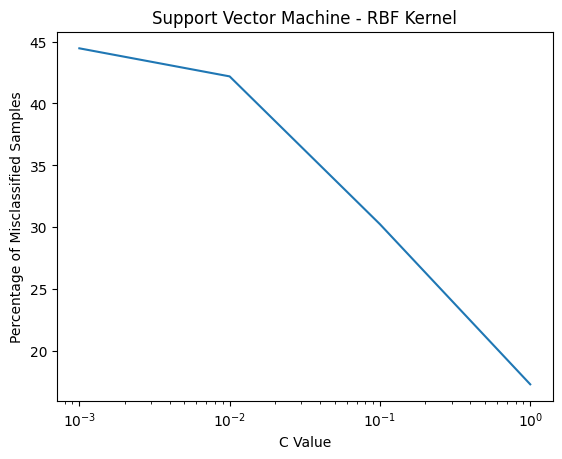

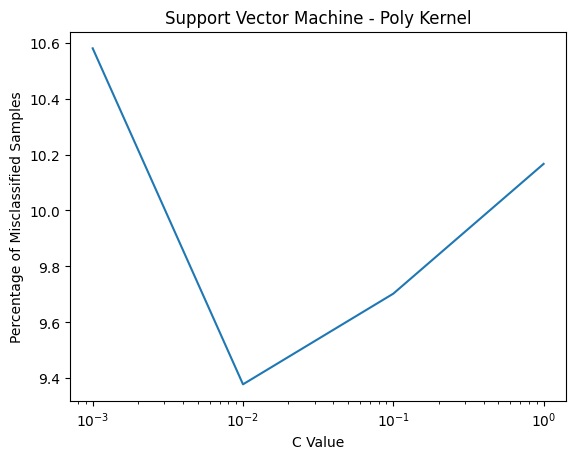

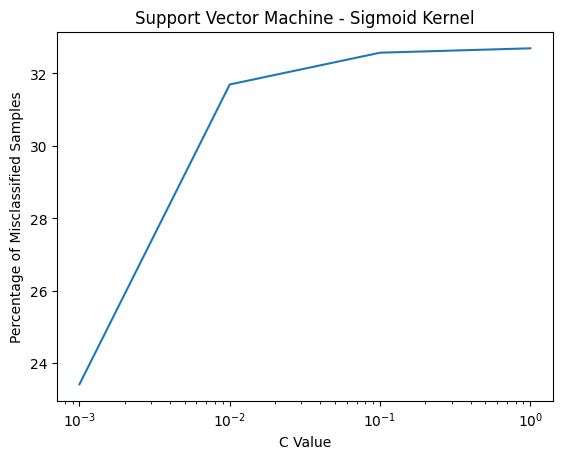

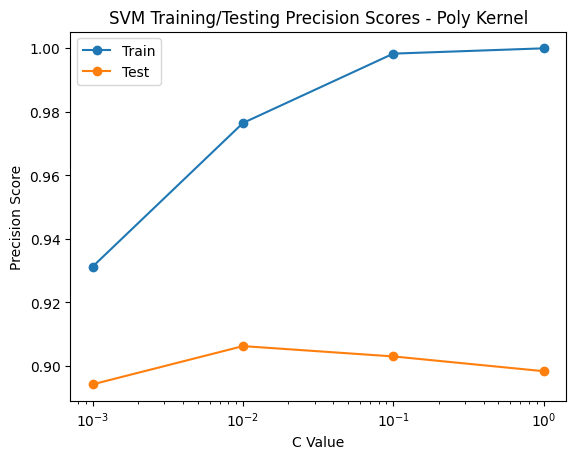

In [ ]:
# Plot SVM misclassified percentage for each kernel
plt.xscale('log')
plt.plot(cparam, misclassified_percent[:4])
plt.xlabel("C Value" )
plt.ylabel("Percentage of Misclassified Samples")
plt.title("Support Vector Machine - RBF Kernel" )
plt.show()

plt.xscale('log')
plt.plot(cparam, misclassified_percent[4:8])
plt.xlabel("C Value" )
plt.ylabel("Percentage of Misclassified Samples")
plt.title("Support Vector Machine - Poly Kernel" )
plt.show()

plt.xscale('log')
plt.plot(cparam, misclassified_percent[8:])
plt.xlabel("C Value" )
plt.ylabel("Percentage of Misclassified Samples")
plt.title("Support Vector Machine - Sigmoid Kernel" )
plt.show()

# Precision score train-test comparison, only on Poly kernel
plt.xscale('log')
plt.plot(cparam, train_prec_score[4:8], '-o', label='Train')
plt.plot(cparam, test_prec_score[4:8], '-o', label='Test')
plt.xlabel("C Value" )
plt.ylabel("Precision Score" )
plt.title("SVM Training/Testing Precision Scores - Poly Kernel" )
plt.legend()

------- Further Improvements ------- 

Running Doc2Vec for 1 epoch with LogisticRegression classifier. Approx runtime: **4 minutes**. Achieved accuracy: 0.916

In [ ]:
# based on https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

import os
import scipy
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import doc2vec
import time
from __future__ import division
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

link = 'https://drive.google.com/file/d/1FzIVaTg6Ws_epPR-ARCyToHyK1fnISe2/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k liwc.csv') 
link = 'https://drive.google.com/file/d/1-0XH8nTBwnAroL69YApeooukBZVI6QKP/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k absolutism.csv')
link = 'https://drive.google.com/file/d/1-20PjS8__KR1MhA8E3btz_9yUso_94gM/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k controversy.csv')
 
dfone = pd.read_csv('79k liwc.csv')
dftwo = pd.read_csv('79k absolutism.csv')
dftwo = dftwo[['Absolutist']]
dfthree = pd.read_csv('79k controversy.csv')
dfthree = dfthree[['HighControversial','MediumControversial','LowControversial']]

dfone['Absolutist'] = dftwo['Absolutist'].values
dfone['HighControversial'] = dfthree['HighControversial'].values
dfone['MediumControversial'] = dfthree['MediumControversial'].values
dfone['LowControversial'] = dfthree['LowControversial'].values

dfcopy = dfone
print(dfcopy)
df = dfone[['Text','Label']]

df['Text'] = df['Text'].apply(cleanText)

X, y = df.iloc[:, 0].values, df.iloc[:, 1].values


# train-test split - 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(1):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train') # construct paragraph vectors
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

X, y = dfcopy.iloc[:, 4:].values, dfcopy.iloc[:, 0].values

# train-test split - 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train = np.concatenate((X_train, train_vectors_dbow), axis=1)
X_test = np.concatenate((X_test, test_vectors_dbow), axis=1)

print(X_train.shape)
print(X_test.shape)

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# standardize input
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

       Label ColumnID                                               Text  \
0          1     Text  In the small southern market town of Molcaxac,...   
1          1     Text  Killing Obama administration rules, dismantlin...   
2          1     Text  The confirmation process for Republican Presid...   
3          1     Text  NICE, France  —   It was the first and last fi...   
4          0     Text  Home » Silver » Silver News » It’s Only A Matt...   
...      ...      ...                                                ...   
78583      0     Text  Patrick Henningsen 21st Century WireDespite re...   
78584      1     Text  ASHTON HAYES, England  —   This small village ...   
78585      1     Text  The U.S. Senate has postponed confirmation hea...   
78586      0     Text  While in Virginia, GOP presidential nominee Do...   
78587      1     Text  Latest And Perhaps Last Debate Highlights Anim...   

       Segment    WC  Analytic  Clout  Authentic   Tone    WPS  ...  Comma  \
0        

<ipython-input-3-3b7d8f4b6b69>:26: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
<ipython-input-3-3b7d8f4b6b69>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
<ipython-input-3-3b7d8f4b6b69>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(cleanText)
100%|██████████| 78588/78588 [00:00<00:00, 2508519.44it/s]
<ipython-input-3-3b7d8f4b6b69>:57: DeprecationWarning: Call t

(62870, 422)
(15718, 422)


In [ ]:
# Kelsey's code for Logistic Regression
# Classifier: Logistic Regression
print( "Logistic Regression Classifier" )

cparam = [ 0.001, 0.01, 0.1, 0.25, 0.3, 0.4, 0.5, 0.75, 0.9, 1 ]
training_time = []
testing_time = []
misclassified_samp = []
misclassified_percent = []
train_prec_score = []
test_prec_score = []

for x in range ( len (cparam) ):
  start_time = time.time()
  
  logreg = LogisticRegression( random_state = 5, C=cparam[x], max_iter = 1000 ) 
  logreg.fit( X_train_std, y_train )
  end_time = time.time()
  print( "C =", cparam[x])
  print( "Training time:", end_time - start_time )
  training_time.append( end_time - start_time )
  
  start_time = time.time()
  y_pred = logreg.predict( X_test_std )
  end_time = time.time()
  print( "Testing time:", end_time - start_time )
  testing_time.append( end_time - start_time )
  print( "# of samples tested:", len(y_test) )
  print('Misclassified samples: %d'%(y_test != y_pred).sum())
  misclassified_samp.append((y_test != y_pred).sum())
  print ('Percentage of Misclassified samples:',(y_test != y_pred).sum() / len(y_test) * 100 ) 
  misclassified_percent.append((y_test != y_pred).sum() / len(y_test) * 100)
  
  print( "Training Precision Score:", logreg.score( X_train_std, y_train ))
  train_prec_score.append( logreg.score( X_train_std, y_train ) )
  print( "Testing Precision Score:", logreg.score( X_test_std, y_test ))
  test_prec_score.append( logreg.score( X_test_std, y_test ) )
  print()

Logistic Regression Classifier
C = 0.001
Training time: 2.1728744506835938
Testing time: 0.015921831130981445
# of samples tested: 15718
Misclassified samples: 1351
Percentage of Misclassified samples: 8.59524112482504
Training Precision Score: 0.9155081915062828
Testing Precision Score: 0.9140475887517496

C = 0.01
Training time: 4.452073574066162
Testing time: 0.013010740280151367
# of samples tested: 15718
Misclassified samples: 1325
Percentage of Misclassified samples: 8.429825677567122
Training Precision Score: 0.9180054079847304
Testing Precision Score: 0.9157017432243288

C = 0.1
Training time: 8.452677488327026
Testing time: 0.01617884635925293
# of samples tested: 15718
Misclassified samples: 1317
Percentage of Misclassified samples: 8.378928616872376
Training Precision Score: 0.9182121838714808
Testing Precision Score: 0.9162107138312763

C = 0.25
Training time: 10.183203220367432
Testing time: 0.009531021118164062
# of samples tested: 15718
Misclassified samples: 1314
Percen

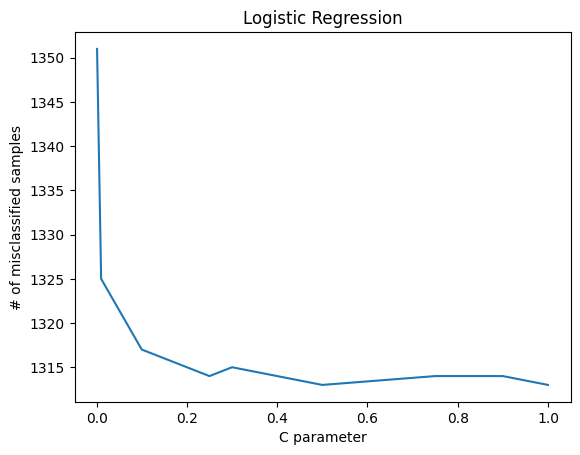

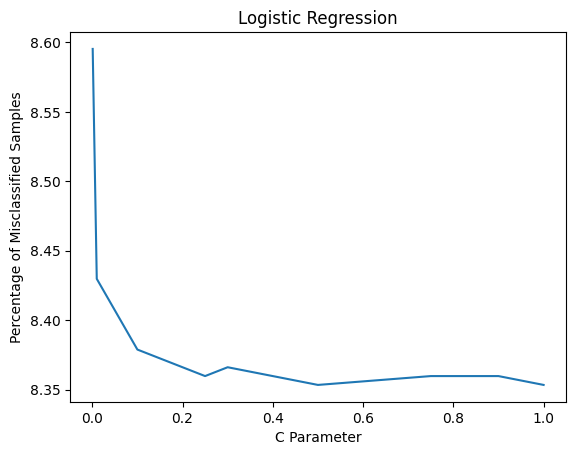

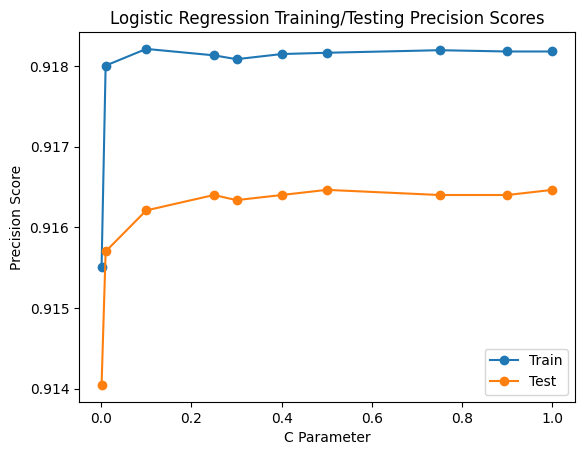

In [ ]:
plt.plot( cparam, misclassified_samp )
plt.xlabel( "C parameter" )
plt.ylabel( "# of misclassified samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, misclassified_percent )
plt.xlabel( "C Parameter" )
plt.ylabel( "Percentage of Misclassified Samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, train_prec_score, '-o', label='Train')
plt.plot( cparam, test_prec_score, '-o', label='Test')
plt.xlabel( "C Parameter" )
plt.ylabel( "Precision Score" )
plt.title( "Logistic Regression Training/Testing Precision Scores" )
plt.legend()

Maximizing LogisticRegression model performance by training Doc2Vec for 30 epochs. Approx runtime: **49 minutes**. Achieved accuracy: 0.9446

In [ ]:
# based on https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

import os
import scipy
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import doc2vec
import time
from __future__ import division
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the complaint narrative.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

link = 'https://drive.google.com/file/d/1FzIVaTg6Ws_epPR-ARCyToHyK1fnISe2/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k liwc.csv') 
link = 'https://drive.google.com/file/d/1-0XH8nTBwnAroL69YApeooukBZVI6QKP/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k absolutism.csv')
link = 'https://drive.google.com/file/d/1-20PjS8__KR1MhA8E3btz_9yUso_94gM/view'
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('79k controversy.csv')
 
dfone = pd.read_csv('79k liwc.csv')
dftwo = pd.read_csv('79k absolutism.csv')
dftwo = dftwo[['Absolutist']]
dfthree = pd.read_csv('79k controversy.csv')
dfthree = dfthree[['HighControversial','MediumControversial','LowControversial']]

dfone['Absolutist'] = dftwo['Absolutist'].values
dfone['HighControversial'] = dfthree['HighControversial'].values
dfone['MediumControversial'] = dfthree['MediumControversial'].values
dfone['LowControversial'] = dfthree['LowControversial'].values

dfcopy = dfone
print(dfcopy)
df = dfone[['Text','Label']]

df['Text'] = df['Text'].apply(cleanText)

X, y = df.iloc[:, 0].values, df.iloc[:, 1].values


# train-test split - 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train') # construct paragraph vectors
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

X, y = dfcopy.iloc[:, 4:].values, dfcopy.iloc[:, 0].values

# train-test split - 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_train = np.concatenate((X_train, train_vectors_dbow), axis=1)
X_test = np.concatenate((X_test, test_vectors_dbow), axis=1)

print(X_train.shape)
print(X_test.shape)

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

# standardize input
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

       Label ColumnID                                               Text  \
0          1     Text  In the small southern market town of Molcaxac,...   
1          1     Text  Killing Obama administration rules, dismantlin...   
2          1     Text  The confirmation process for Republican Presid...   
3          1     Text  NICE, France  —   It was the first and last fi...   
4          0     Text  Home » Silver » Silver News » It’s Only A Matt...   
...      ...      ...                                                ...   
78583      0     Text  Patrick Henningsen 21st Century WireDespite re...   
78584      1     Text  ASHTON HAYES, England  —   This small village ...   
78585      1     Text  The U.S. Senate has postponed confirmation hea...   
78586      0     Text  While in Virginia, GOP presidential nominee Do...   
78587      1     Text  Latest And Perhaps Last Debate Highlights Anim...   

       Segment    WC  Analytic  Clout  Authentic   Tone    WPS  ...  Comma  \
0        

<ipython-input-3-a31d3d6cc853>:26: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
<ipython-input-3-a31d3d6cc853>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
<ipython-input-3-a31d3d6cc853>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].apply(cleanText)
100%|██████████| 78588/78588 [00:00<00:00, 2163455.80it/s]
<ipython-input-3-a31d3d6cc853>:57: DeprecationWarning: Call t

(62870, 422)
(15718, 422)


In [ ]:
# Kelsey's code for Logistic Regression
# Classifier: Logistic Regression
print( "Logistic Regression Classifier" )

cparam = [ 0.001, 0.01, 0.1, 0.25, 0.3, 0.4, 0.5, 0.75, 0.9, 1 ]
training_time = []
testing_time = []
misclassified_samp = []
misclassified_percent = []
train_prec_score = []
test_prec_score = []

for x in range ( len (cparam) ):
  start_time = time.time()
  
  logreg = LogisticRegression( random_state = 5, C=cparam[x], max_iter = 1000 ) 
  logreg.fit( X_train_std, y_train )
  end_time = time.time()
  print( "C =", cparam[x])
  print( "Training time:", end_time - start_time )
  training_time.append( end_time - start_time )
  
  start_time = time.time()
  y_pred = logreg.predict( X_test_std )
  end_time = time.time()
  print( "Testing time:", end_time - start_time )
  testing_time.append( end_time - start_time )
  print( "# of samples tested:", len(y_test) )
  print('Misclassified samples: %d'%(y_test != y_pred).sum())
  misclassified_samp.append((y_test != y_pred).sum())
  print ('Percentage of Misclassified samples:',(y_test != y_pred).sum() / len(y_test) * 100 ) 
  misclassified_percent.append((y_test != y_pred).sum() / len(y_test) * 100)
  
  print( "Training Precision Score:", logreg.score( X_train_std, y_train ))
  train_prec_score.append( logreg.score( X_train_std, y_train ) )
  print( "Testing Precision Score:", logreg.score( X_test_std, y_test ))
  test_prec_score.append( logreg.score( X_test_std, y_test ) )
  print()

Logistic Regression Classifier
C = 0.001
Training time: 1.6555697917938232
Testing time: 0.00995492935180664
# of samples tested: 15718
Misclassified samples: 895
Percentage of Misclassified samples: 5.694108665224584
Training Precision Score: 0.9438842055034198
Testing Precision Score: 0.9430589133477542

C = 0.01
Training time: 2.716132640838623
Testing time: 0.011656045913696289
# of samples tested: 15718
Misclassified samples: 873
Percentage of Misclassified samples: 5.554141748314035
Training Precision Score: 0.9459996818832511
Testing Precision Score: 0.9444585825168597

C = 0.1
Training time: 6.202113628387451
Testing time: 0.010087966918945312
# of samples tested: 15718
Misclassified samples: 875
Percentage of Misclassified samples: 5.566866013487721
Training Precision Score: 0.9462541752823286
Testing Precision Score: 0.9443313398651227

C = 0.25
Training time: 8.5256028175354
Testing time: 0.015045642852783203
# of samples tested: 15718
Misclassified samples: 872
Percentage o

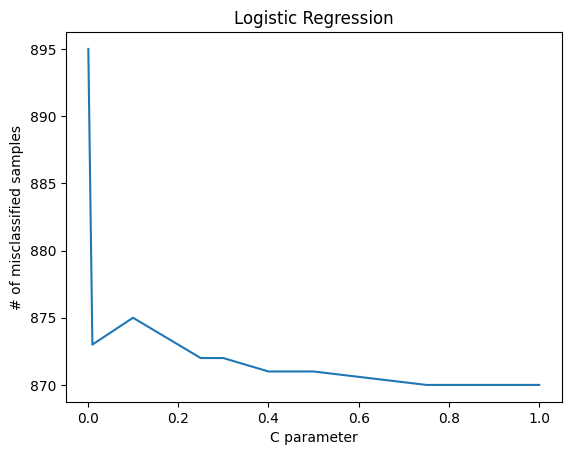

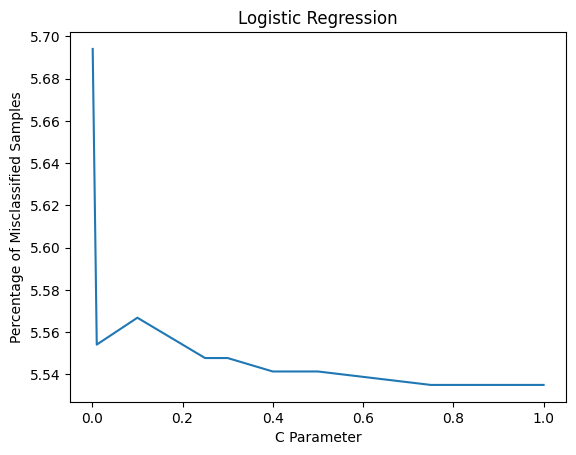

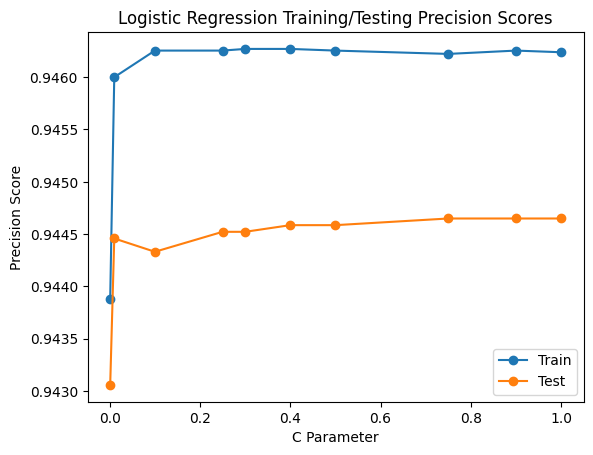

In [ ]:
plt.plot( cparam, misclassified_samp )
plt.xlabel( "C parameter" )
plt.ylabel( "# of misclassified samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, misclassified_percent )
plt.xlabel( "C Parameter" )
plt.ylabel( "Percentage of Misclassified Samples")
plt.title( "Logistic Regression" )
plt.show()

plt.plot( cparam, train_prec_score, '-o', label='Train')
plt.plot( cparam, test_prec_score, '-o', label='Test')
plt.xlabel( "C Parameter" )
plt.ylabel( "Precision Score" )
plt.title( "Logistic Regression Training/Testing Precision Scores" )
plt.legend()